<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 
</center>

# [Projet machine learning](Projet-ML)

## Objectifs : 
<span style="color:  rgb(139, 0, 0)">**Notre projet consiste à analyser et faire des prédictions sur un jeu de données qui fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures de la condition physique des membres d’une salle de sport. Il y a deux objectifs principales pour ce projet :  Le premier objectif est de faire une analyse exploratoire des données pour bien cerner nos données. Dans un second temps, on effectuera deux modélisations avec la prédiction de calories brulées et du niveau d'expérience.**</span>

## Table des matières
1. [Analyse explorative des données (langage R)](#analyse-données)
   - Description général (natures des variables, encodages ...)
   - Analyse descriptive unidimensionnelle et bidimensionnelle
   - ACP des différentes variables
2. [Modélisation (langage R et python)](#modélisation)
   - Prédiction des calories brulées
   - Prédiction du niveau d'expérience
# 1. Analyse explorative des donées (langage R)
Cette partie se fera uniquement en R, l'analyse est dans l'autre notebook.

# 2. Modélisation (langage python)

# 2.1 Prédiction des calories brulées (régression)

README : ce qu'il reste à faire 

    -Sélections de variables et comparer sans

    -Comparer en fonction du MSE, du R^2 score, des résidus et les courbes prédit/vrai
    
    -Eventuellement optimiser quelques méthodes (arbres, réseaux ) attention couteu : faire sur le serveur GMM

## 2.1.1 Ajustement des données 

In [46]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
data=pd.read_csv("gym_members_exercise_tracking.csv",sep=",",header=0)
data.head()
data.dtypes
#On doit vérifier si les types sont bon, par exemple on va interpréter Experience_Level et Workout_Frequency comme des variables qualitatives avec des modalités. 

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [47]:
#Transformation de nos données au bon format voulu
data["Gender"]=pd.Categorical(data["Gender"],ordered=False)
data["Workout_Type"]=pd.Categorical(data["Workout_Type"],ordered=False)
data["Workout_Frequency (days/week)"]=pd.Categorical(data["Workout_Frequency (days/week)"],ordered=False)
data["Experience_Level"]=pd.Categorical(data["Experience_Level"],ordered=False)
data.dtypes

Age                                 int64
Gender                           category
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                             int64
Avg_BPM                             int64
Resting_BPM                         int64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                     category
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)    category
Experience_Level                 category
BMI                               float64
dtype: object

In [48]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,49.840000


On va maintenant récupérer les variables explicatives en transformant les données de manière a pouvoir les utiliser en régression et classification. 

In [49]:
#Variables explicatives
################Variables qualitatives
dataDum=pd.get_dummies(data[["Gender","Workout_Type","Workout_Frequency (days/week)","Experience_Level"]]) 
# pour transformer des variables qualitatives en variables indicatrices, 
# chaque valeur unique de la variable qualitative devient une colonne distincte dans le DataFrame résultant

################Variables quantitatives
dataQuant=data[["Age","Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","BMI"]] 

# Concaténation des variables explicatives
dfC=pd.concat([dataDum,dataQuant],axis=1)
dfC.head()
#print(type(dfC))


,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency (days/week)_2,Workout_Frequency (days/week)_3,Workout_Frequency (days/week)_4,Workout_Frequency (days/week)_5,...,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),BMI
0,False,True,False,False,False,True,False,False,True,False,...,56,88.3,1.71,180,157,60,1.69,12.6,3.5,30.20
1,True,False,False,True,False,False,False,False,True,False,...,46,74.9,1.53,179,151,66,1.30,33.9,2.1,32.00
2,True,False,True,False,False,False,False,False,True,False,...,32,68.1,1.66,167,122,54,1.11,33.4,2.3,24.71
3,False,True,False,False,True,False,False,True,False,False,...,25,53.2,1.70,190,164,56,0.59,28.8,2.1,18.41
4,False,True,False,False,True,False,False,True,False,False,...,38,46.1,1.79,188,158,68,0.64,29.2,2.8,14.39


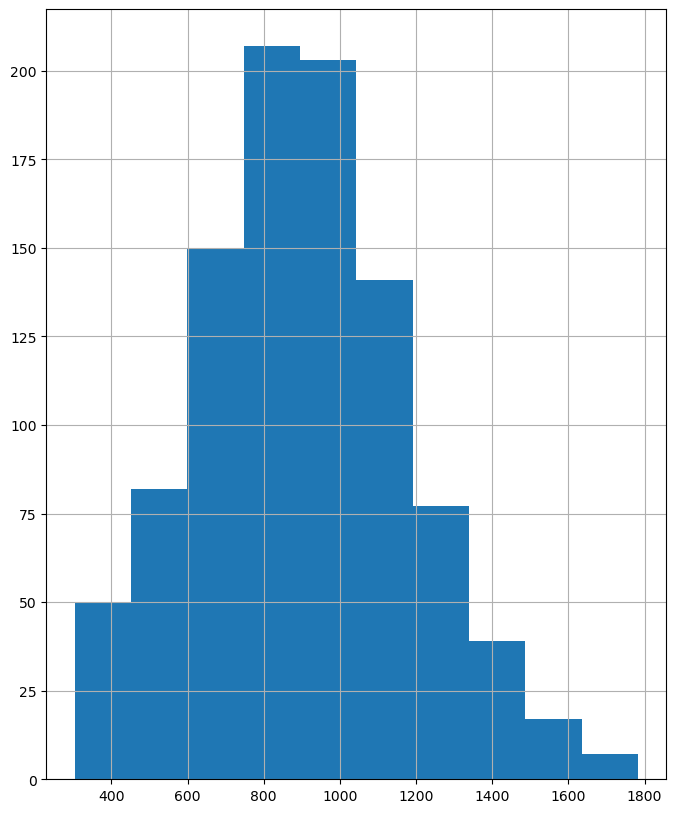

In [50]:
#Variables à prédire/expliquer 
YC=data["Calories_Burned"]
#print(type(YC))
YC.hist()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split  
Lignes_Data=data.shape[0]
Colonnes_Data=data.shape[1]
Nbre_Element=data.size
#Séparation de notre jeu de données en 4 sous ensembles en 2 parties : parti test, parti train
Xc_train,Xc_test,YC_train,YC_test=train_test_split(dfC,YC,test_size=0.2,random_state=11) #test_size=0.2 indique qu'on prend 20%
#print(type(YC_train))

On va standardiser nos données, indispensables pour une utilisation efficase des algorithmes non linéaires : SVM, réseaux de neuronnes etc ...

In [52]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(Xc_train)  
XC_train = scaler.transform(Xc_train)  
# Meme transformation sur le test
XC_test = scaler.transform(Xc_test)

## 2.2 Régression par modèles linéaires 

In [53]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regLasso = linear_model.Lasso()
regLasso.fit(XC_train,YC_train)
prev=regLasso.predict(XC_test)
print("MSE=",mean_squared_error(YC_test,prev))

MSE= 1585.529698494295


In [54]:
from sklearn.metrics import r2_score
print("R2=",r2_score(YC_test,prev))

R2= 0.9813767896831493


Les fonctions de modèles linéaires et linéaires généralisés sont limitées dans [Scikit-learn](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) et sans sorties numériques (tests) détaillées. Il est préférable d'utiliser une autre librairie [StatsModels](http://statsmodels.sourceforge.net/stable/examples/notebooks/generated/glm.html) dont les sorties sont inspirées de celles de R. Dans les deux cas, les stratégies classiques (forward, backward, stepwise) de sélection de variables par optimisation d'un critère (Cp, AIC, BIC) ne semblent pas disponibles, même si AIC et BIC sont présents dans `scikit-learn`, et le type DataFrame (package `pandas`) n'est pas reconnu.

La façon efficace de procéder est donc d'introduire une [pénalisation Lasso](http://wikistat.fr/pdf/st-m-app-select.pdf) pour opérer une sélection de variables ou plutôt la sélection de variables quantitatives et d'indicatrices des modalités de celles qualitatives mais sans analyse fine des interactions comme cela est possible avec R.

Le paramètre de pénalisation Lasso est optimisé par validation croisée.

In [ ]:
from sklearn.model_selection import GridSearchCV

# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.4,0.5,1,1.2,1.3,1.4,1.5]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(XC_train, YC_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))
##  Meilleur R2 = 0.977484, Meilleur paramètre = {'alpha': 1.3}

Meilleur R2 = 0.977484, Meilleur paramètre = {'alpha': 1.3}


In [61]:
prev=regLassOpt.predict(XC_test)
print("MSE=",mean_squared_error(prev,YC_test))
print("R2=",r2_score(YC_test,prev))  #très bonne corrélation 

# Coefficients
regLassoOpt=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso_Opt=regLassoOpt.fit(XC_train,YC_train)
print(model_lasso_Opt.coef_) #matrice des coefficients

coef = pd.Series(model_lasso_Opt.coef_, index = Xc_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))


MSE= 1587.4968465791533
R2= 0.9813536840847216
[-4.10648020e+01  2.13637734e-13  2.41636599e-01 -0.00000000e+00
  0.00000000e+00 -2.17334753e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  5.05132750e-01 -1.48254769e-01  0.00000000e+00
  0.00000000e+00 -4.00426228e+01  1.16663901e+00  5.35938383e-01
 -0.00000000e+00  8.88559531e+01  6.64300419e-01  2.40676856e+02
 -8.56423688e-01  0.00000000e+00  0.00000000e+00]
Lasso conserve 13 variables et en supprime 10


In [ ]:
# Variables retenues (coefficients non nuls)
coeff=model_lasso_Opt.coef_
retained_vars = [(var, coef) for var, coef in zip(dfC.columns, coeff) if coef != 0]

print("\nVariables retenues par Lasso (coefficients non nuls) :n=",len(retained_vars))
for var, coef in retained_vars:
    print(f"{var:30s} -> {coef:.4f}")


Variables retenues par Lasso (coefficients non nuls) :n= 13
Gender_Female                  -> -41.0648
Gender_Male                    -> 0.0000
Workout_Type_Cardio            -> 0.2416
Workout_Type_Yoga              -> -2.1733
Workout_Frequency (days/week)_5 -> 0.5051
Experience_Level_1             -> -0.1483
Age                            -> -40.0426
Weight (kg)                    -> 1.1666
Height (m)                     -> 0.5359
Avg_BPM                        -> 88.8560
Resting_BPM                    -> 0.6643
Session_Duration (hours)       -> 240.6769
Fat_Percentage                 -> -0.8564


Text(0.5, 1.0, 'Coefficients du modèle lasso')

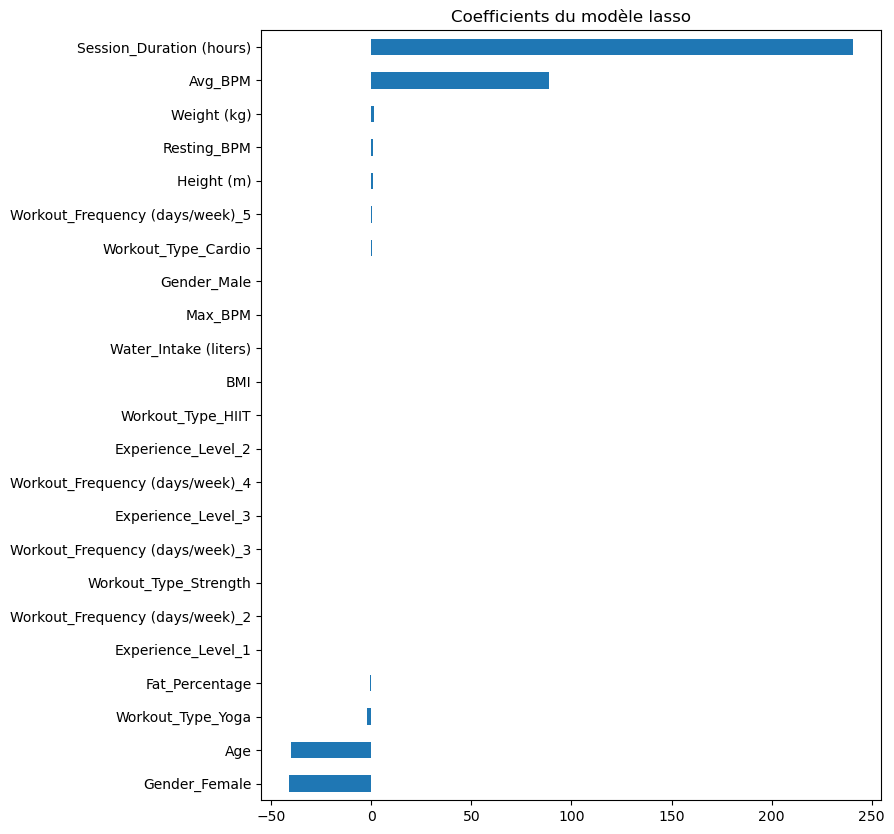

In [60]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

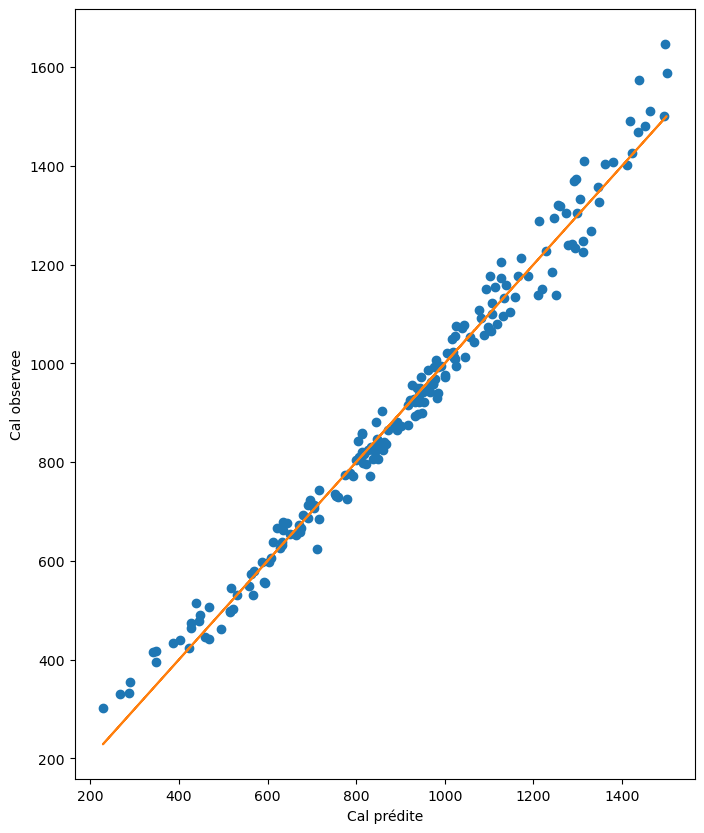

927    1044.0
729     423.0
610    1408.0
143     958.0
931     836.0
        ...  
514     831.0
922    1135.0
650     303.0
908     549.0
775     807.0
Name: Calories_Burned, Length: 195, dtype: float64


In [64]:

plt.plot(prev,YC_test,"o")
plt.plot(prev,prev)
plt.xlabel(u"Cal prédite")
plt.ylabel("Cal observee")
plt.show()

print(YC_test)

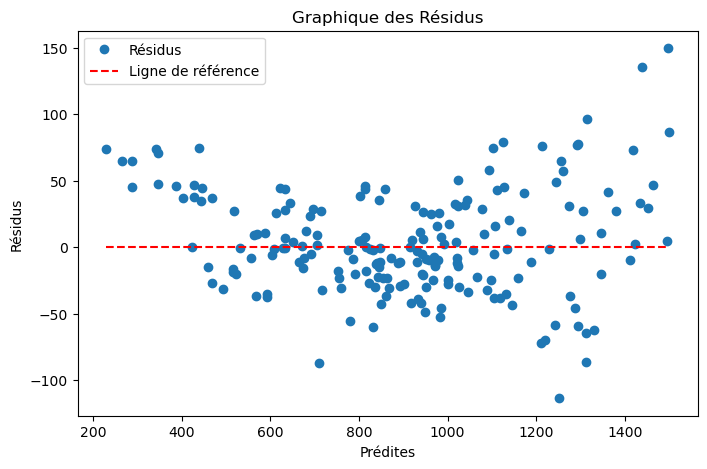

In [77]:
#print(type(YC_test))*
prev=regLassOpt.predict(XC_test)
residus=YC_test-prev
plt.figure(figsize=(8, 5))
plt.plot(prev,residus,"o",label='Résidus')
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0, min(prev), max(prev), colors='red', linestyles='dashed', label='Ligne de référence')
plt.legend()
plt.title("Graphique des Résidus")
plt.show()

Matrice de confusion avec seuillage

In [18]:
from sklearn.metrics import confusion_matrix

prev_continuous=np.copy(prev)
YC_test_continuous=np.copy(YC_test)
##On prédit sur un seuil donné 
seuil = 500 #500 cal brulée 
table=confusion_matrix((prev_continuous > seuil).astype(int),(YC_test_continuous > seuil).astype(int))
print(table)

[[ 17   2]
 [  2 174]]


*Scikit-learn* propose d'autres procédures d'optimisation du paramètre de régularisation lasso par validation croisée en régression; `lassoCV` utilise un algorithme de *coordinate descent*, sans calcul de dérivée puisque la norme *l1* n'est pas dérivable, tandis que `lassoLarsCV` est basée sur l'algorithme de *least angle regression*. Ces fonctions permettent de tracer également les *chemins de régularisation*. Voici l'exemple de `lassoCV` qui offre plus d'options.

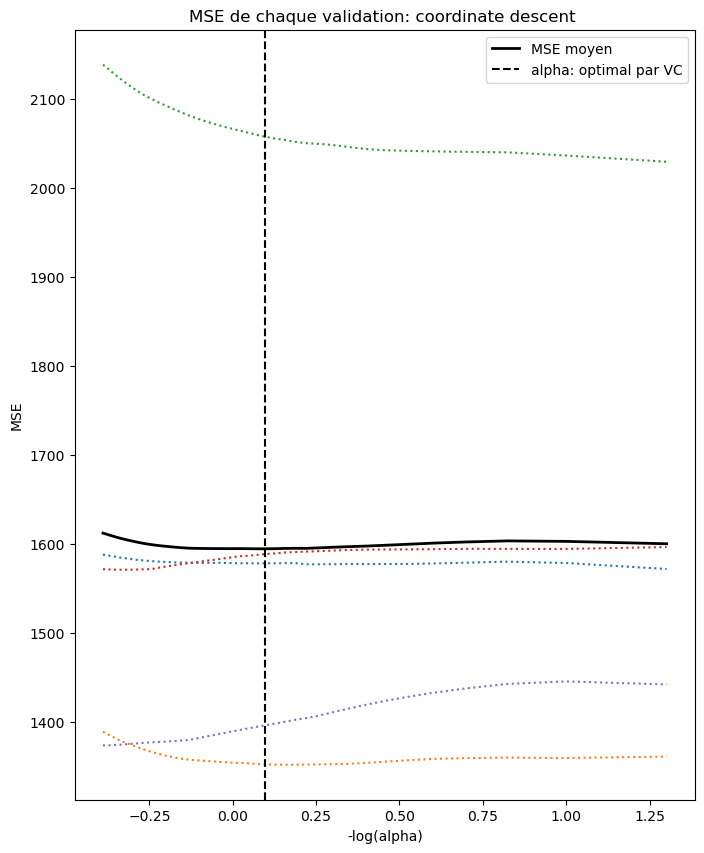

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(XC_train,YC_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

On retrouve le $\alpha=0.13$ environ. On prend maintenant cette valeur pour $\alpha$ et on va faire de la sélection de variables. 

In [ ]:
# Pour tout le jeu de données
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.13)
lasso.fit(XC_train, YC_train)

# 2. Récupérer les noms des variables retenues (coefficients ≠ 0)
coef = lasso.coef_
selected_features = [name for name, c in zip(dfC.columns, coef) if c != 0]

print("Variables retenues :", selected_features)
dfC_selected = dfC[selected_features]

# Pour l'entraînement et le test déjà normalisés
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_selected = dfC[selected_features]
X_train_sel, X_test_sel = train_test_split(X_selected, test_size=0.2, random_state=11)
XC_train_sel = scaler.fit_transform(X_train_sel)
XC_test_sel = scaler.transform(X_test_sel)

On va tracer les chemins de regularisation. 

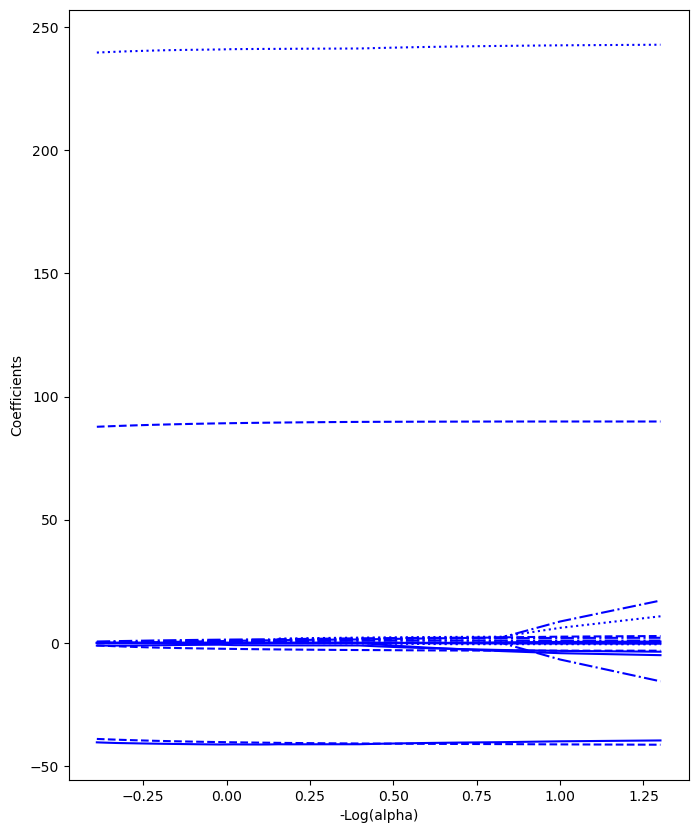

In [20]:
from itertools import cycle
# print(type(YC_train))
# print(np.shape(XC_train),np.shape(YC_train))
from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(XC_train,YC_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
# print(np.shape(neg_log_alphas_lasso ))
# print(np.shape(coefs_lasso))
# print(np.shape(alphas_lasso))
for coef_l, s in zip(coefs_lasso, styles):
    
   
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

## 2. kNN et SVR

## 2.1 kNN : Classification


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
#Variables explicatives
################Variables qualitatives
dataDum=pd.get_dummies(data[["Gender","Workout_Type","Workout_Frequency (days/week)","Experience_Level"]]) 
# pour transformer des variables qualitatives en variables indicatrices, 
# chaque valeur unique de la variable qualitative devient une colonne distincte dans le DataFrame résultant

################Variables quantitatives
dataQuant=data[["Age","Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","BMI"]] 

# Concaténation des variables explicatives

dfC=pd.concat([dataDum,dataQuant],axis=1)
#print(type(dfC))

YC = data['Calories_Burned']
dfC_Classi=dfC.copy()
dfC_Classi['Calories_Category'] = pd.qcut(YC, q=3, labels=['Low', 'Medium', 'High']) # Transformation de "Calories_Burned" en 3 catégories
# Encoder la variable cible
le = LabelEncoder()
dfC_Classi['Calories_Category'] = le.fit_transform(dfC_Classi['Calories_Category'])
# Préparation des données pour la classification
X = dfC_Classi.drop(columns=['Calories_Category'])  # exclure la cible
y = dfC_Classi['Calories_Category']  # cible


# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimisation du paramètre k
param_grid = [{"n_neighbors": list(range(1, 15))}]
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
knnOpt = knn.fit(X_train, y_train)

# Paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1 - knnOpt.best_score_, knnOpt.best_params_))

Meilleur score = 0.340596, Meilleur paramètre = {'n_neighbors': 14}


In [22]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-knnOpt.score(X_train, y_train)

0.2956298200514139

In [23]:
# Prévision de l'échantillon test
y_chap = knnOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,y_test)
print(table)

Calories_Category   0   1   2
row_0                        
0                  46   1   6
1                   7  53  24
2                  16   9  33


# 2.2 : kNN régression.

In [24]:
from sklearn.neighbors import KNeighborsRegressor
# Optimisation de k (nombre de voisins)
param_grid = [{"n_neighbors": list(range(1, 15))}]
knn_reg = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, n_jobs=-1)
knnOpt = knn_reg.fit(XC_train, YC_train)

# Meilleur paramètre
print("Meilleur score (cross-val MSE) = %f, Meilleur paramètre = %s" % (1 - knnOpt.best_score_, knnOpt.best_params_))

Meilleur score (cross-val MSE) = 0.332871, Meilleur paramètre = {'n_neighbors': 14}


MSE sur l'échantillon test : 847989.80


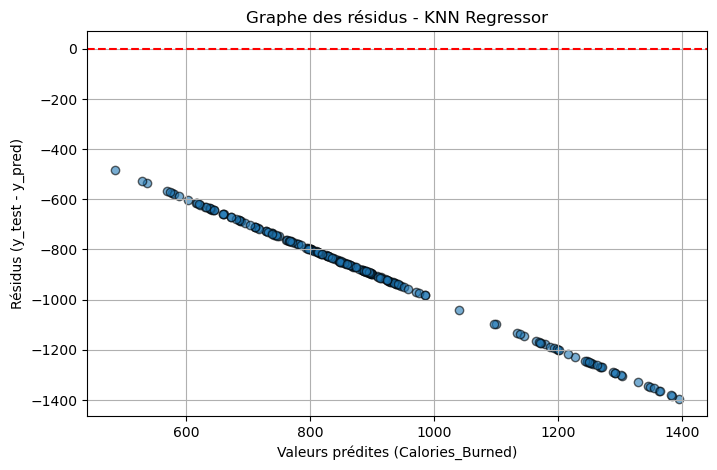

In [25]:
# Prédictions sur l’échantillon test
y_pred = knnOpt.predict(XC_test)

# Calcul du MSE sur test
mse_test = mean_squared_error(y_test, y_pred)
print("MSE sur l'échantillon test : %.2f" % mse_test)

# Tracé des résidus
residus = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residus, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valeurs prédites (Calories_Burned)')
plt.ylabel('Résidus (y_test - y_pred)')
plt.title('Graphe des résidus - KNN Regressor')
plt.grid(True)
plt.show()

## 2.2 SVR

In [26]:
from sklearn.svm import SVR
#Au cas où
scaler = StandardScaler()
XC_train = scaler.fit_transform(X_train)
XC_test = scaler.transform(X_test)
#optimisation des autres paramètres 
param_grid = { 
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.01, 0.1, 1],
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"]
}

svr = GridSearchCV(SVR(), param_grid, cv=5, n_jobs=-1)
svrOpt = svr.fit(XC_train, YC_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svrOpt.best_score_, svrOpt.best_params_))


Meilleur score = 0.045864, Meilleur paramètre = {'C': 100, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


In [27]:
# erreur de régression sur le test
1-svrOpt.score(XC_test,YC_test)

0.025466773148531074

MSE sur l'échantillon test (SVR) : 2168.17


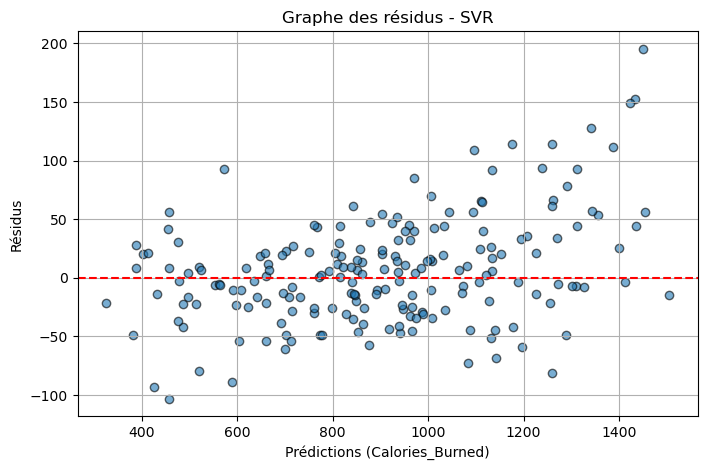

In [28]:
# Prédictions sur le jeu de test
y_pred = svrOpt.predict(XC_test)

# Calcul des résidus
residus = YC_test - y_pred

# Calcul du MSE
mse_svr = mean_squared_error(YC_test, y_pred)
print("MSE sur l'échantillon test (SVR) : %.2f" % mse_svr)

# Tracé des résidus
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residus, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prédictions (Calories_Burned)')
plt.ylabel('Résidus')
plt.title('Graphe des résidus - SVR')
plt.grid(True)
plt.show()

# Arbre de régression 

Meilleur score = 0.077248, Meilleur paramètre = {'max_depth': 8}
MSE sur l'échantillon test (arbre de régression) : 5554.57


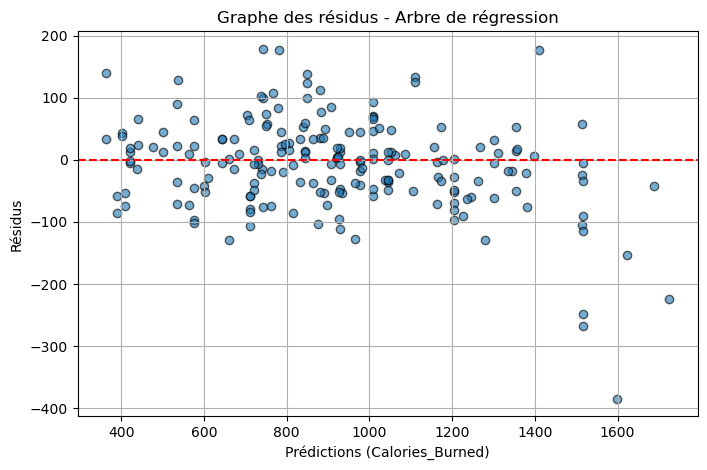

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Optimisation de la profondeur de l'arbre
param = [{"max_depth": list(range(2, 10))}]
tree = GridSearchCV(DecisionTreeRegressor(), param, cv=10, n_jobs=-1)
treeOpt = tree.fit(XC_train, YC_train)

# Affichage du meilleur paramètre
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_, treeOpt.best_params_))
# Prédictions sur le jeu de test
y_pred_tree = treeOpt.predict(XC_test)

# Calcul des résidus
residus_tree = YC_test - y_pred_tree

# MSE
mse_tree = mean_squared_error(YC_test, y_pred_tree)
print("MSE sur l'échantillon test (arbre de régression) : %.2f" % mse_tree)

# Tracé des résidus
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_tree, residus_tree, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prédictions (Calories_Burned)')
plt.ylabel('Résidus')
plt.title('Graphe des résidus - Arbre de régression')
plt.grid(True)
plt.show()

MSE sur l'échantillon test : 2168.1721


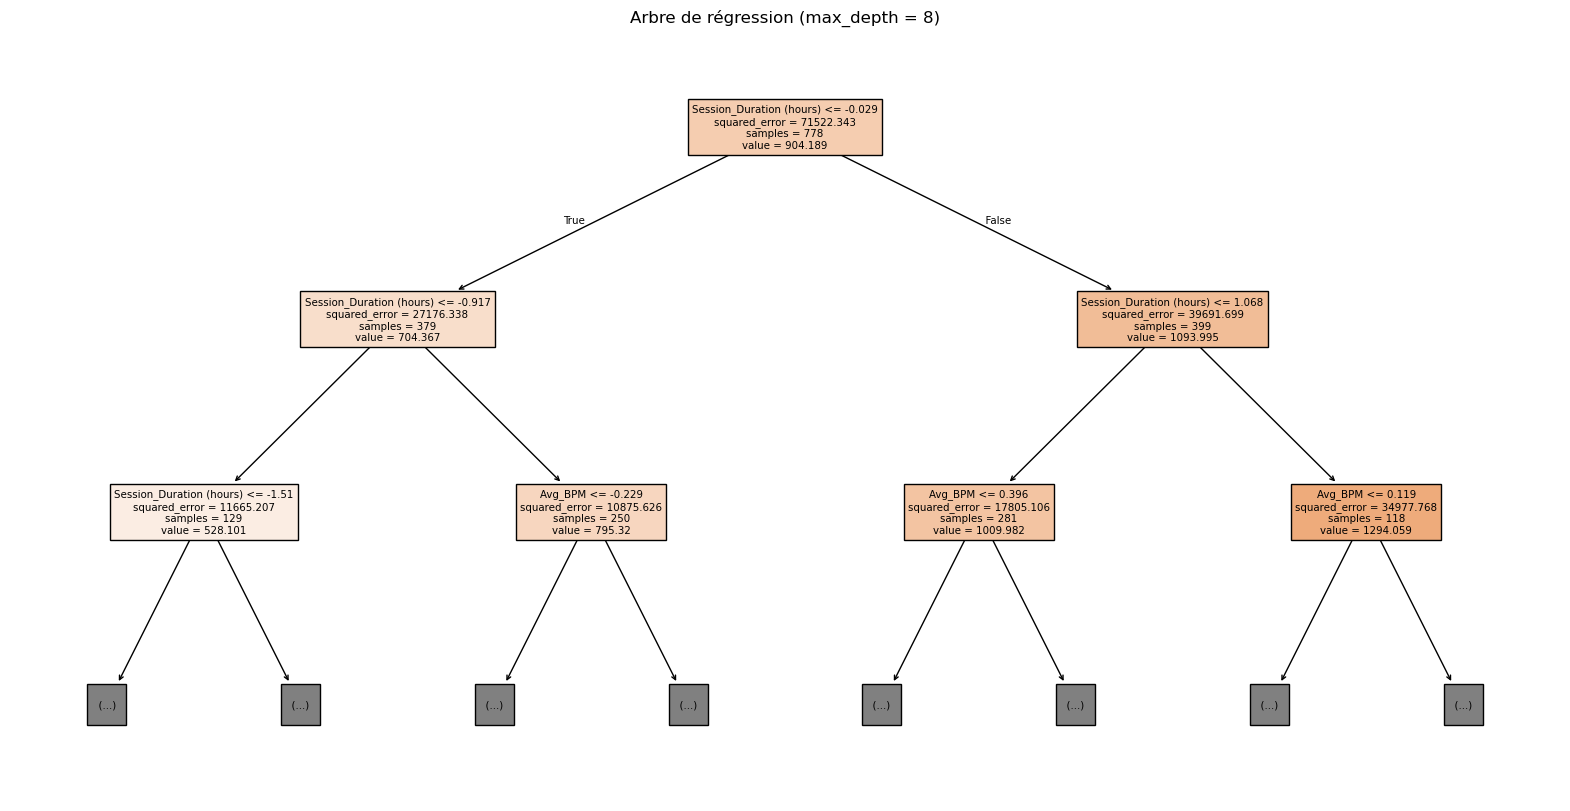

In [30]:

from sklearn.tree import DecisionTreeRegressor, plot_tree
# Ré-entraînement de l'arbre avec la profondeur optimale trouvée
treeG = DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(XC_train, YC_train)

# Calcul du MSE
mse = mean_squared_error(YC_test, y_pred)
print(f"MSE sur l'échantillon test : {mse:.4f}")
# Tracé de l'arbre
plt.figure(figsize=(20, 10))  # Ajuste la taille pour la lisibilité
plot_tree(treeG, feature_names=dfC.columns.tolist(), filled=True, max_depth=2)
plt.title("Arbre de régression (max_depth = %d)" % treeOpt.best_params_['max_depth'])
plt.show()


MSE sur l'échantillon test : 5150.5291


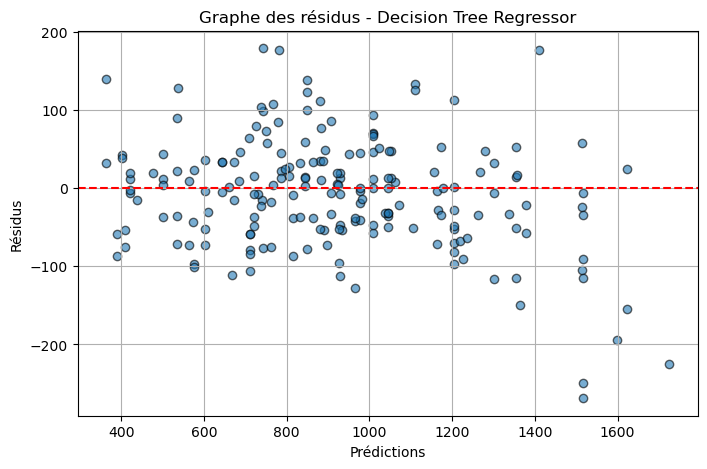

In [31]:

# Prédictions sur l'échantillon test
y_pred = treeG.predict(XC_test)

# Calcul des résidus
residus = YC_test - y_pred

# Calcul du MSE
mse = mean_squared_error(YC_test, y_pred)
print(f"MSE sur l'échantillon test : {mse:.4f}")

# Tracé des résidus
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residus, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Graphe des résidus - Decision Tree Regressor')
plt.grid(True)
plt.show()

# 4 Forêt aléatoire 

Meilleur score = 0.031537, Meilleur paramètre = {'max_features': 20}
Erreur OOB (MSE approximatif) = N/A
MSE sur échantillon test = 1731.0858


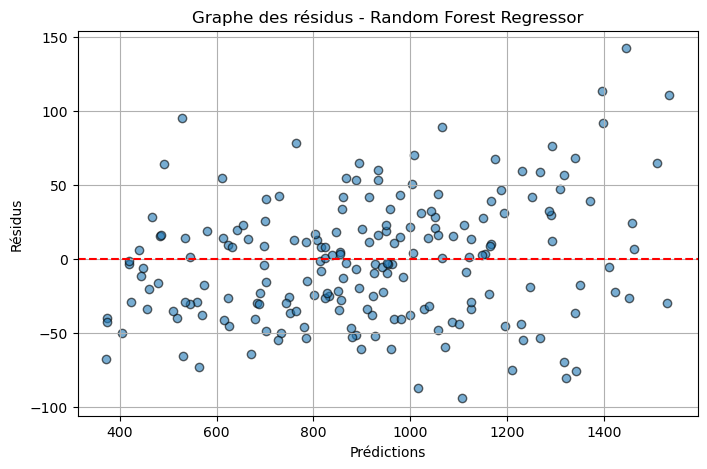

In [32]:
from sklearn.ensemble import RandomForestRegressor

param = [{"max_features": list(range(5, 22))}]
rf = GridSearchCV(RandomForestRegressor(n_estimators=100, random_state=42),
                  param, cv=5, n_jobs=-1)
rfOpt = rf.fit(XC_train, YC_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_, rfOpt.best_params_))

# Affichage de l'erreur OOB (out-of-bag error)
print(f"Erreur OOB (MSE approximatif) = {1 - rfOpt.oob_score_ if hasattr(rfOpt, 'oob_score_') else 'N/A'}")

# Prédiction sur l'échantillon test
y_pred = rfOpt.predict(XC_test)

# Calcul du MSE sur l'échantillon test
mse = mean_squared_error(YC_test, y_pred)
print(f"MSE sur échantillon test = {mse:.4f}")

# Tracé des résidus
residus = YC_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residus, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Graphe des résidus - Random Forest Regressor')
plt.grid(True)
plt.show()

In [33]:
# erreur de prévision sur le test
1-rfOpt.score(XC_test,YC_test)

0.020332873654516193

In [34]:
rf = RandomForestRegressor(n_estimators=100, max_features=2, random_state=42)
rfFit = rf.fit(XC_train, YC_train)

# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(XC_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

Session_Duration (hours) 0.25350385292000105
Fat_Percentage 0.14017786104052354
Experience_Level_3 0.08610724857381806
Avg_BPM 0.07481173291622642
Experience_Level_1 0.06224882446553932
Water_Intake (liters) 0.04799797694094496
Weight (kg) 0.047633836938883956
Age 0.038272068651661176
BMI 0.033662832201778584
Height (m) 0.03214236781966954
Max_BPM 0.028817535355538083
Resting_BPM 0.02790341702324843
Experience_Level_2 0.026851096609498623
Workout_Frequency (days/week)_5 0.026382271413777584
Workout_Frequency (days/week)_2 0.014260454660466831
Workout_Frequency (days/week)_3 0.013017648670870867
Workout_Frequency (days/week)_4 0.009799144430793492
Gender_Male 0.008454605012830865
Gender_Female 0.00668698177097331
Workout_Type_Strength 0.006062192619902468
Workout_Type_Cardio 0.005540661528943578
Workout_Type_HIIT 0.005323894635494616
Workout_Type_Yoga 0.004341493798614637


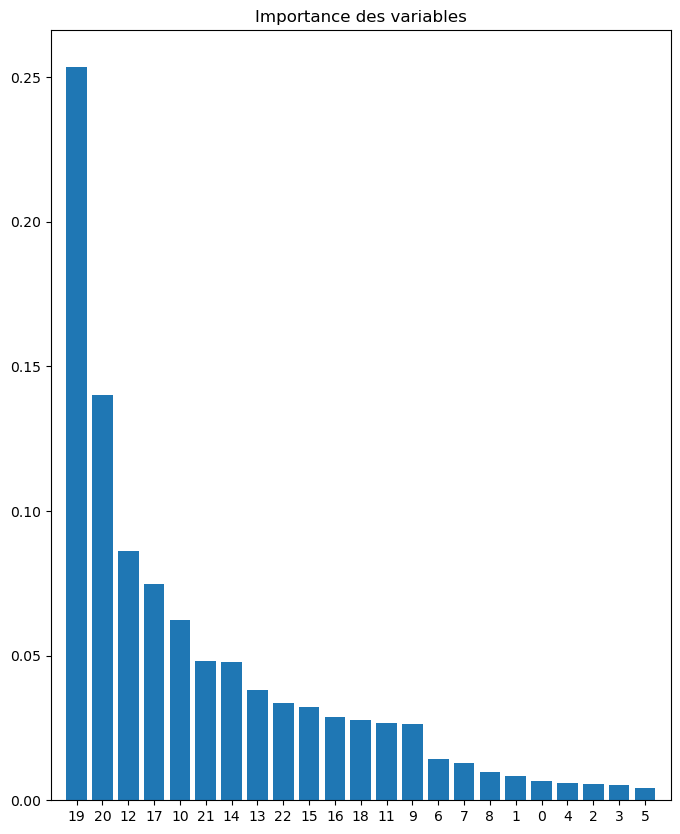

In [35]:
# Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(XC_train.shape[1]), importances[indices]);
plt.xticks(range(XC_train.shape[1]), indices);
plt.xlim([-1, XC_train.shape[1]]);
plt.show()

# 5 Réseaux de Neuronnes

| Paramètre            | Type / Valeurs possibles                        | Rôle                                                             |
| -------------------- | ----------------------------------------------- | ---------------------------------------------------------------- |
| `hidden_layer_sizes` | `[(50,), (100,), (50,50), (100,50), (100,100)]` | Architecture du réseau (nombres de neurones par couche cachée)   |
| `activation`         | `["identity", "logistic", "tanh", "relu"]`      | Fonction d'activation dans les couches cachées                   |
| `solver`             | `["lbfgs", "sgd", "adam"]`                      | Algorithme d’optimisation                                        |
| `alpha`              | `[0.0001, 0.001, 0.01, 0.1, 1]`                 | Terme de régularisation L2                                       |
| `batch_size`         | `["auto", 16, 32, 64, 128]`                     | Taille des mini-lots pour SGD ou adam                            |
| `learning_rate`      | `["constant", "invscaling", "adaptive"]`        | Stratégie d’adaptation du taux d’apprentissage                   |
| `learning_rate_init` | `[0.001, 0.01, 0.1]`                            | Taux d’apprentissage initial                                     |
| `max_iter`           | `[200, 300, 500, 1000]`                         | Nombre maximal d’itérations                                      |
| `early_stopping`     | `[True, False]`                                 | Active un arrêt automatique si la validation ne s'améliore plus  |
| `tol`                | `[1e-4, 1e-3]`                                  | Tolérance pour l’arrêt de l’optimisation                         |
| `momentum`           | `[0.9, 0.95, 0.99]` (si `solver='sgd'`)         | Moment utilisé lors de l’optimisation par SGD                    |
| `n_iter_no_change`   | `[5, 10, 20]`                                   | Nombre d’itérations sans amélioration pour `early_stopping=True` |


In [36]:
from sklearn.neural_network import MLPRegressor

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Meilleur score = 0.981072
Meilleur paramètre = {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}
MSE sur test = 1344.7775


c:\Users\edgar\anaconda3\envs\PyEnv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


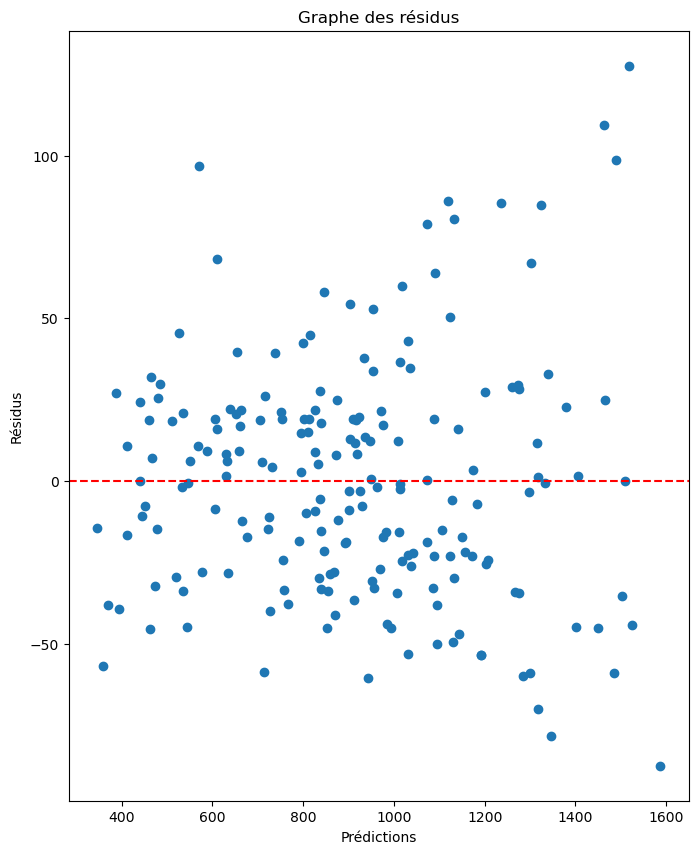

In [37]:
#Système de paramètres pour l'optimisation
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50), (50, 25)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "lbfgs"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.001, 0.01],
}

mlp = MLPRegressor(max_iter=300, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(XC_train, YC_train)

print("Meilleur score = %f" % (grid_search.best_score_))
print("Meilleur paramètre =", grid_search.best_params_)

# Évaluation sur test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(XC_test)
mse = mean_squared_error(YC_test, y_pred)
print(f"MSE sur test = {mse:.4f}")


residuals = YC_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.title("Graphe des résidus")
plt.show()